In [26]:
from utils.data_reading import *
import matplotlib.pyplot as plt
import numpy as np

lidar_data=read_lidar_data("./lidar_data/29/RCS_2905_023651.xlsx")
lidar_data=lidar_data.iloc[0:330]
# lidar_data = lidar_data.drop(columns=[627,615], axis=1)



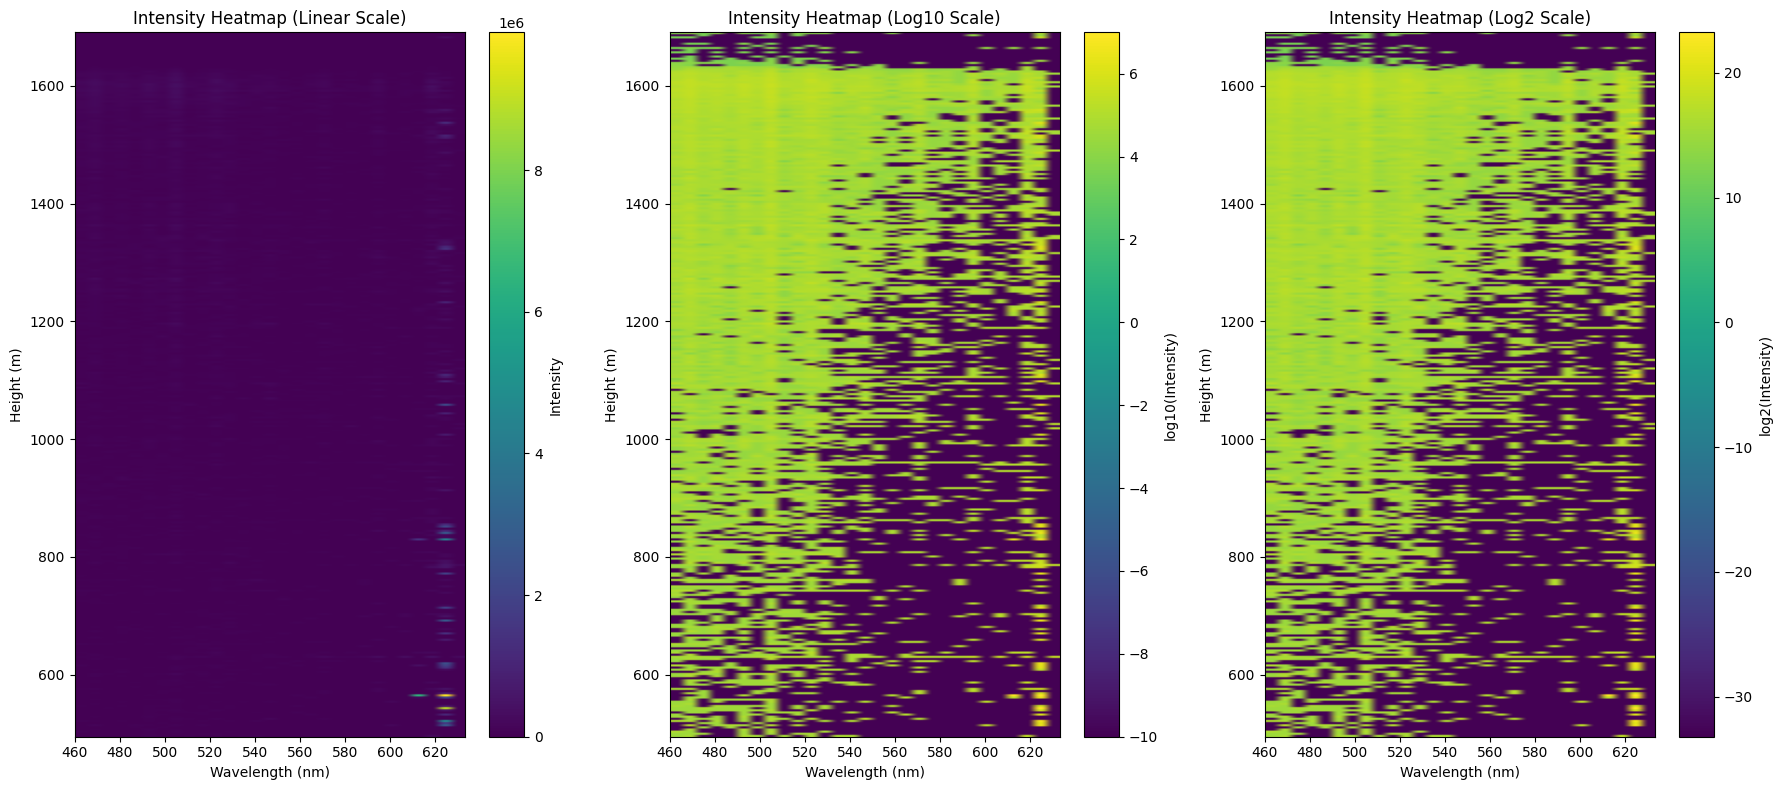

In [27]:
# 2. Heatmap showing intensity vs height and wavelength
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))

# Linear scale heatmap
im1 = ax1.imshow(lidar_data.values, aspect='auto', cmap='viridis', 
                 extent=[lidar_data.columns.min(), lidar_data.columns.max(), lidar_data.index.min(), lidar_data.index.max()])
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Height (m)')
ax1.set_title('Intensity Heatmap (Linear Scale)')
plt.colorbar(im1, ax=ax1, label='Intensity')

# Log scale heatmap (add small value to avoid log(0))
log_data = np.log10(lidar_data.values + 1e-10)
im2 = ax2.imshow(log_data, aspect='auto', cmap='viridis',
                 extent=[lidar_data.columns.min(), lidar_data.columns.max(), lidar_data.index.min(), lidar_data.index.max()])
ax2.set_xlabel('Wavelength (nm)')
ax2.set_ylabel('Height (m)')
ax2.set_title('Intensity Heatmap (Log10 Scale)')
plt.colorbar(im2, ax=ax2, label='log10(Intensity)')

log_data = np.log2(lidar_data.values + 1e-10)
im3 = ax3.imshow(log_data, aspect='auto', cmap='viridis',
                 extent=[lidar_data.columns.min(), lidar_data.columns.max(), lidar_data.index.min(), lidar_data.index.max()])
ax3.set_xlabel('Wavelength (nm)')
ax3.set_ylabel('Height (m)')
ax3.set_title('Intensity Heatmap (Log2 Scale)')
plt.colorbar(im3, ax=ax3, label='log2(Intensity)')

plt.tight_layout()
plt.show()

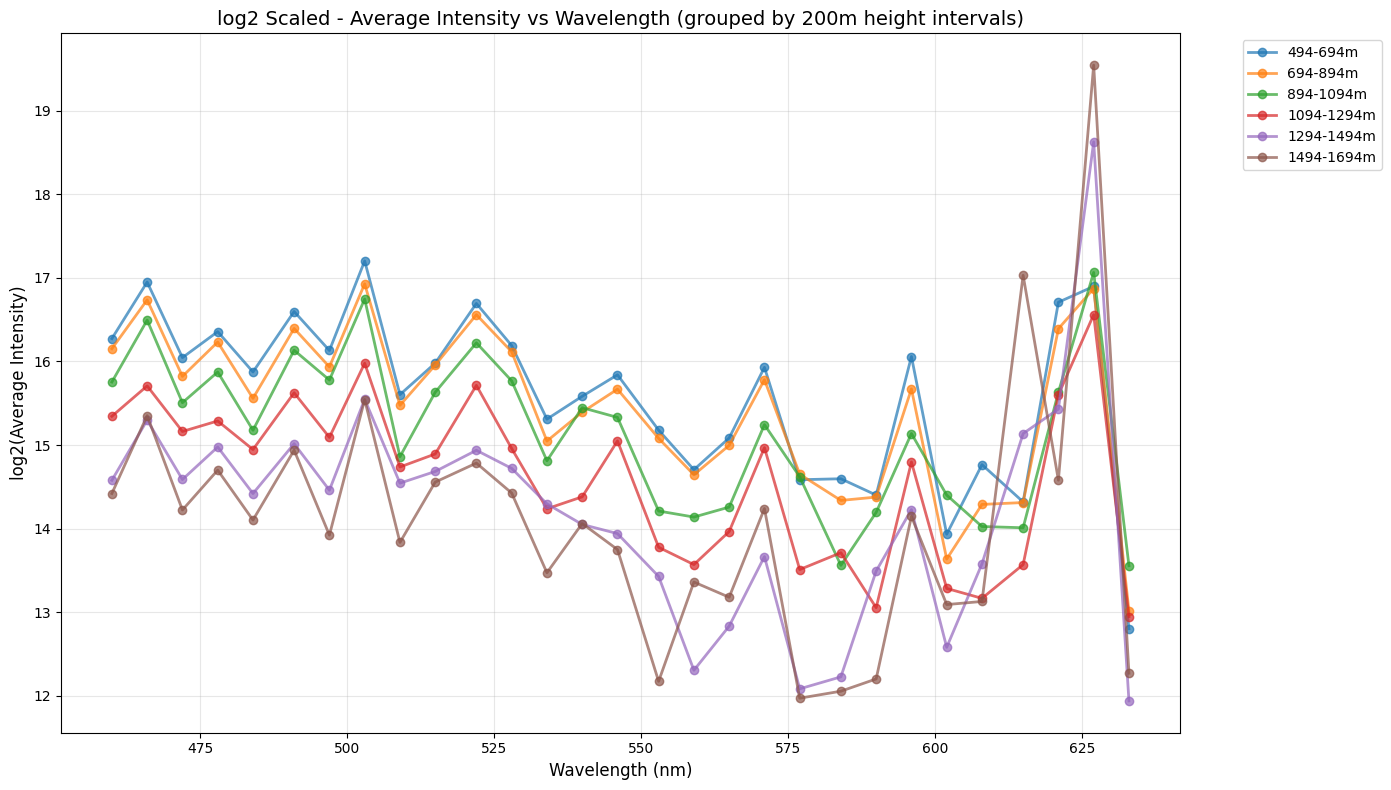

Log2 scaled grouped data shape: (6, 29)


In [ ]:
# Create height bins (every 200m)
bin_size = 200
height_bins = np.arange(lidar_data.index.min(), lidar_data.index.max() + bin_size, bin_size)
height_labels = [f'{int(height)}-{int(height + bin_size)}m' for height in height_bins[:-1]]

# Create a copy to avoid modifying the original
lidar_copy = lidar_data.copy()
lidar_copy['height_bin'] = pd.cut(lidar_copy.index, bins=height_bins, labels=height_labels, include_lowest=True)

# Group by height bin and average across columns (wavelengths)
grouped_data = lidar_copy.groupby('height_bin', observed=True).mean()

# Get wavelengths for x-axis (exclude 'height_bin' column)
wavelengths_array = grouped_data.columns.astype(float)


# Apply log2 scaling to grouped data
grouped_data_log2 = np.log2(grouped_data.values + 1e-10)

# Create line chart with log2 scale
plt.figure(figsize=(14, 8))

for idx, height_range in enumerate(grouped_data.index):
    plt.plot(wavelengths_array, grouped_data_log2[idx], marker='o', linewidth=2, 
             label=height_range, alpha=0.7)

plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('log2(Average Intensity)', fontsize=12)
plt.title('log2 Scaled - Average Intensity vs Wavelength (grouped by 200m height intervals)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Log2 scaled grouped data shape: {grouped_data_log2.shape}")